<a href="https://colab.research.google.com/github/FarmOmics/PyTorch_deep_larning/blob/main/Copy_of_PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'1.13.0+cu116'

In [ ]:
# Setup device 
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


#**1. Create data**


In [ ]:
# Create some data using linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     prediction=None):
    """
    Plots traning data, test data and compare predictions
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if prediction is not None:
          # Plot the prediction if they exist
          plt.scatter(test_data, prediction, c = "r", s=4, label="Predictons")
    
    # Show the legend
    plt.legend(prop={"size": 14})


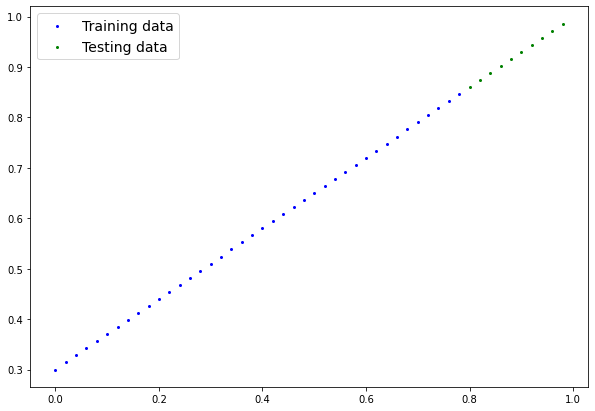

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)


#**2. Build PyTorch linear model**

In [ ]:
# Create a linear model by subclassing nn.Model
class linearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
# Set the manual seed
torch.manual_seed(42)
model_1 = linearRegressionModelV2()
model_1, model_1.state_dict()

(linearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

#**3. Training**
##For training we need:
*   Loss fucntion
*   Optimizer
*   Training loop
*   Testing loop




In [ ]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)



In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)
    
    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 10 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 20 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 30 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 40 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 50 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 60 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 70 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 80 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 90 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 100 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 110 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.001264503574930

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

# **4. Making and evaluating predictions**

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make prediciton on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

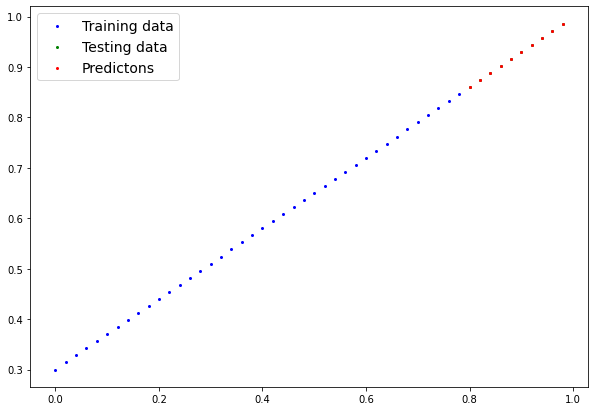

In [ ]:
# Check our our model predictions visually
plot_predictions(prediction = y_preds)

# **5. Saving & loading a trained model**

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_NAME = MODEL_PATH / MODEL_NAME

MODEL_SAVE_NAME

PosixPath('models/01_pytorch_workflow_model_1.pth')

In [ ]:
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_NAME}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_NAME)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# Load a PyTorch model

# Create a new instance if linear regression model V2
loaded_model_1 = linearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_NAME))

# Put the loaded to device
loaded_model_1.to(device)


linearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Evaluate loaded model

loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# **End!!!**